In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

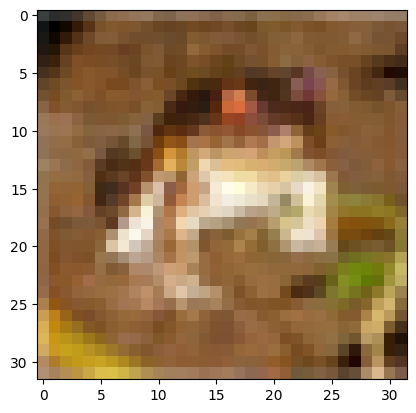

In [6]:
plt.imshow(x_train[0])

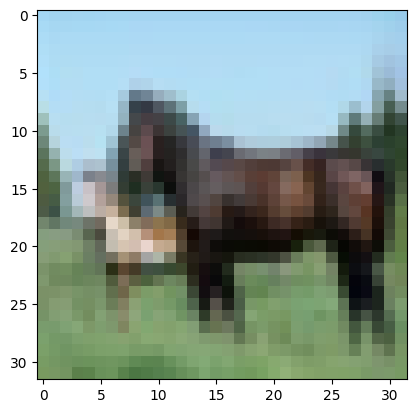

In [7]:
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
#Rescale the data

x_train = x_train/225
x_test = x_test/255

In [12]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [13]:
from tensorflow.keras.utils import to_categorical

y_train.shape

(50000, 1)

In [14]:
y_train[0]

array([6], dtype=uint8)

In [15]:
# convert the numric op to categorical data

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [16]:
y_cat_train.shape


(50000, 10)

In [17]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Model Building

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [22]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5215 - accuracy: 0.4516 - val_loss: 1.3491 - val_accuracy: 0.5246
Epoch 2/15
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1742 - accuracy: 0.5891 - val_loss: 1.0959 - val_accuracy: 0.6171
Epoch 3/15
1563/1563 [==============================] - 66s 43ms/step - loss: 1.0216 - accuracy: 0.6470 - val_loss: 1.1356 - val_accuracy: 0.6081
Epoch 4/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9120 - accuracy: 0.6857 - val_loss: 1.0340 - val_accuracy: 0.6509
Epoch 5/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8268 - accuracy: 0.7151 - val_loss: 1.0231 - val_accuracy: 0.6555
Epoch 6/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7587 - accuracy: 0.7386 - val_loss: 1.1734 - val_accuracy: 0.6173
Epoch 7/15
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6990 - accuracy: 0.7614 - val_loss: 1.1035 -

In [23]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.521483,0.45162,1.349120,0.5246
1,1.174208,0.58908,1.095877,0.6171
2,1.021626,0.64702,1.135587,0.6081
3,0.912023,0.68574,1.034000,0.6509
4,0.826799,0.71508,1.023134,0.6555


<Axes: >

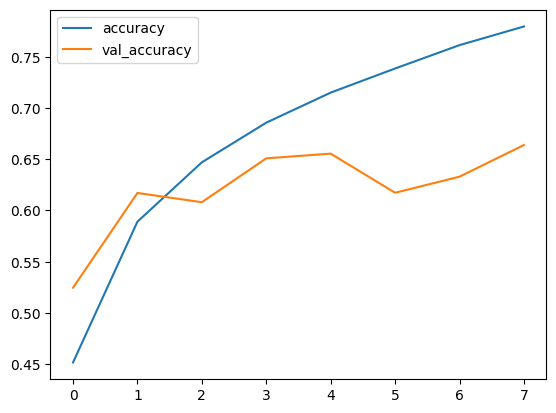

In [24]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

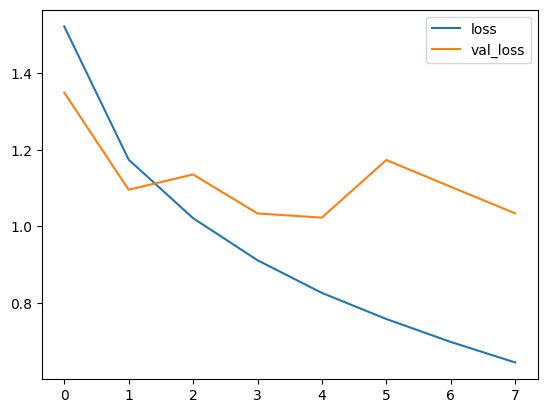

In [25]:
losses[['loss','val_loss']].plot()

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0342305898666382, 0.6639000177383423]


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)

predictions = y_pred.argmax(axis=1)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

313/313 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

           0       0.81      0.60      0.69      1000
           1       0.80      0.75      0.78      1000
           2       0.53      0.60      0.57      1000
           3       0.45      0.55      0.50      1000
           4       0.63      0.66      0.64      1000
           5       0.51      0.62      0.56      1000
           6       0.67      0.79      0.73      1000
           7       0.85      0.62      0.71      1000
           8       0.84      0.72      0.77      1000
           9       0.77      0.73      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.69      0.66      0.67     10000
weighted avg       0.69      0.66      0.67     10000

[[598  24 108  54  25  32  21  10  85  43]
 [ 17 754  29  17   5  16  37   7  19  99]
 [ 33   5 602  75  90  96  73  17   5   4]
 [ 10   6  80 548  61 192  86   6   4   7]
 [  4   5  79

#predict

In [29]:
my_image = x_test[16]

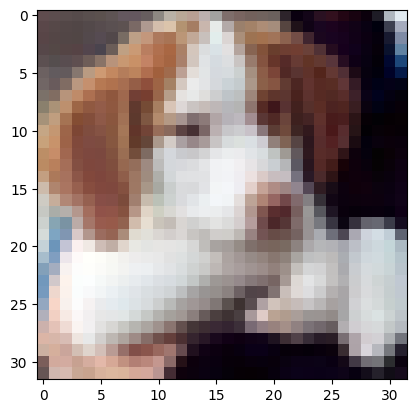

In [30]:
plt.imshow(my_image)

In [33]:
my_image=my_image.reshape(1,32,32,3)

predicted_probabilities = model.predict(my_image)

predicted_class = predicted_probabilities.argmax()

print(predicted_class)

1/1 [==============================] - 0s 40ms/step
5
